## Problem 1

## (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

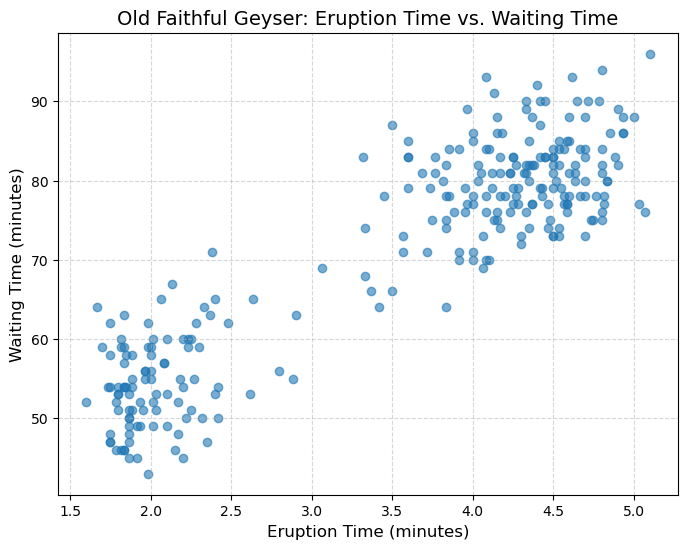

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'faithful.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.6)
plt.title("Old Faithful Geyser: Eruption Time vs. Waiting Time", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## (b) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)

Ans: 2 clusters, Shorter eruptions and Longer eruptions times.

## (C) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 

Ans: Hierarchical clustering can be either agglomerative (bottom-up) or divisive (top-down)First of all, 

1. We consider each data point as an own cluster.

2. After that, we calculate the pairwise distances between clusters and amalgamate the nearest ones according to a linkage criterion (e.g., single, complete, or average linkage).

3. Then, we return to the second step until all data points are consolidated into a singular massive cluster or a predetermined stopping criterion is satisfied.

Implementing agglomerative hierarchical clustering indicates that hierarchical clustering is suitable for this dataset. This is due to the presence of two different groups that hierarchical clustering can accurately discern. Furthermore, the dendrogram would plainly depict the two primary clusters, validating the inherent grouping identified in the scatter plot.

## Problem 2

## (a) Your source code for the k-means algorithm. You need to implement the algorithm from scratch. 

In [40]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'faithful.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Prepare the data for clustering (ignoring the first column if it contains IDs)
data_for_clustering = data[['eruptions', 'waiting']].values

# K-Means Algorithm Implementation
def k_means(X, k, max_iterations=100, tolerance=1e-4):
    """
    Implements the K-Means clustering algorithm from scratch.
    
    Parameters:
        X (ndarray): 2D array of data points (n_samples, n_features).
        k (int): Number of clusters.
        max_iterations (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance for centroid updates.
    
    Returns:
        centroids (ndarray): Final centroids.
        labels (ndarray): Cluster labels for each data point.
    """
    # Randomly initialize centroids from the data points
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Step 1: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centroids as the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence (centroid updates below the tolerance)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels

# Apply the K-Means algorithm
k = 2  # Number of clusters based on observation
centroids, labels = k_means(data_for_clustering, k)


## (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot

Centroids:
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]

First few rows with assigned clusters:
   eruptions  waiting  Cluster_From_Scratch
0      3.600       79                     0
1      1.800       54                     1
2      3.333       74                     0
3      2.283       62                     1
4      4.533       85                     0


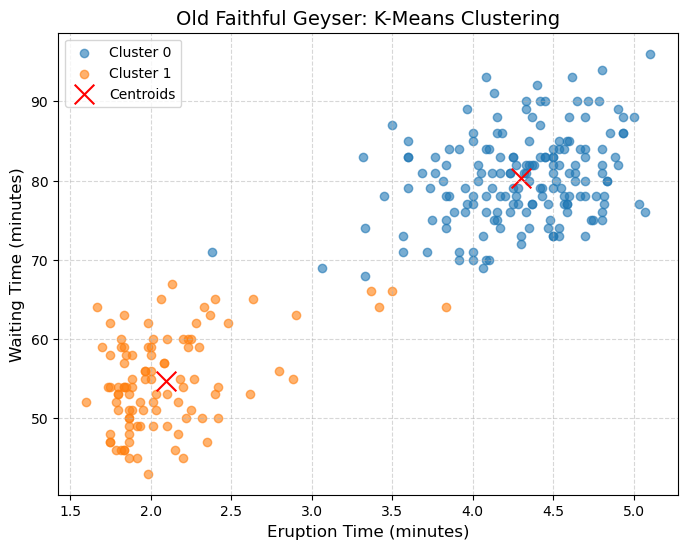

In [43]:
# Add cluster labels to the dataset
data['Cluster_From_Scratch'] = labels

# Output the centroids and the first few rows of the dataset
print("Centroids:")
print(centroids)

print("\nFirst few rows with assigned clusters:")
print(data.head())

# Visualize the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = data_for_clustering[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title("Old Faithful Geyser: K-Means Clustering", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## (c) A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is 

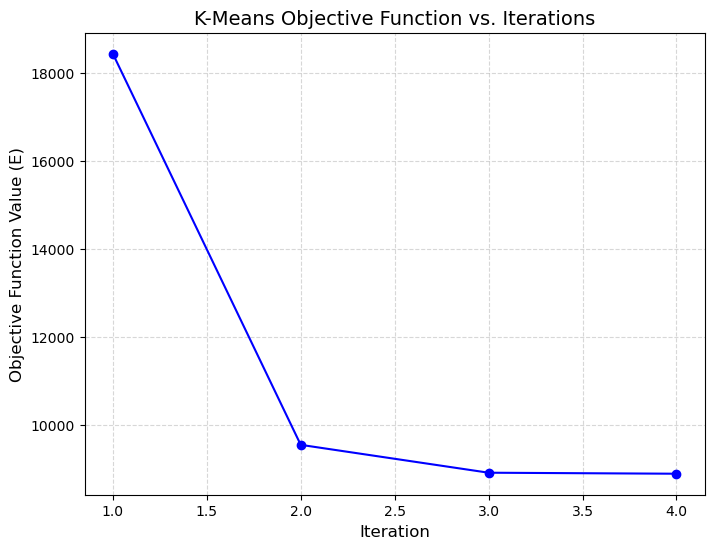

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'faithful.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Prepare the data for clustering (ignoring the first column if it contains IDs)
data_for_clustering = data[['eruptions', 'waiting']].values

# K-Means function with tracking of the objective function
def k_means_with_objective(X, k, max_iterations=100, tolerance=1e-4):
    """
    Implements the K-Means clustering algorithm and tracks the objective function.
    
    Parameters:
        X (ndarray): 2D array of data points (n_samples, n_features).
        k (int): Number of clusters.
        max_iterations (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance for centroid updates.
    
    Returns:
        centroids (ndarray): Final centroids.
        labels (ndarray): Cluster labels for each data point.
        objectives (list): Objective function values per iteration.
    """
    # Randomly initialize centroids from the data points
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    objectives = []

    for _ in range(max_iterations):
        # Step 1: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Calculate the objective function (sum of squared distances to centroids)
        objective = np.sum([np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k)])
        objectives.append(objective)

        # Step 3: Update centroids as the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k) if np.any(labels == i)])

        # Check for convergence (centroid updates below the tolerance)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels, objectives

# Apply the K-Means algorithm with objective tracking
k = 2  # Number of clusters
centroids, labels, objectives = k_means_with_objective(data_for_clustering, k)

# Plot the objective function over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objectives) + 1), objectives, marker='o', linestyle='-', color='b')
plt.title("K-Means Objective Function vs. Iterations", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Objective Function Value (E)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## (d) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?

Ans: 
The K-Means tackle effectively identified the two clusters seen in Problem 1 using visualization. These clusters represent the two separate "blobs" in the scatter plot:

Cluster 1: Shorter eruptions and reduced waiting periods.
Cluster 2: Higher eruptions and longer waiting periods.

K-Means is sensitive to the selection of initial centroids; thus, repeating the algorithm with a different random initialization can produce different outcomes, especially for datasets with overlapping clusters or noise. However, for this dataset, with two distinctly separated clusters, the method is highly likely to converge to an equal solution, regardless of initialization.